<a href="https://colab.research.google.com/github/carlosontiveross/analiseCOVID-19/blob/main/projeto_Carlos_Panorama_do_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 no Brasil e no mundo

COVID-19 é uma doença infecciosa causada pelo coronavírus da Síndrome Respiratória Aguda Grave 2 (SARS-CoV-2).

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa. Entre os sintomas, podem ser destacados: febre, tosse seca e cansaço, e alguns menos comuns, como dores musculares, dor de garganta, perda do olfato, entre outros.

Fato é que não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://conteudo.imguol.com.br/c/entretenimento/de/2022/11/16/coronavirus-virus-da-covid-19-1668619327908_v2_4x3.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, cerca de 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, será realizada uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

Os dados utilizados neste projeto foram obtidos da iniciativa Our World in Data, uma associação acadêmica surgida na universidade de OXFORD, que busca evidenciar as principais publicações mundiais de vários temas globais tais como: saúde, eficiência energética, educação, e muitos outros relacionados ao desenvolvimento social dos países ao redor do globo.

É importante salientar que analisar a COVID-19 a partir dos dados governamentais é uma tarefa complexa e desafiadora, e que inclusive artigos já foram escritos, como o [deste link](https://portal.fiocruz.br/noticia/pesquisadores-alertam-para-ausencia-de-dados-ocupacionais-sobre-covid-19), destacando a dificuldade da obtenção dos dados da doença em trabalhadores.
Os motivos para essa complexidade em ter uma base de dados robusto são vários, entre os quais podem ser destacados:
* Baixo número de pessoas testadas;
* Bases de dados desagregadas;
* Notificações não enviadas ao sistema.

Essa falta de uma base de dados dificulta o entendimento da real dimensão da doença, piorando o enfrentamento da pandemia, mas são ainda esses dados que permitem a compreensão do fenômeno e a melhoria da tomada de decisão por parte das autoridades para um melhor combate à pandemia.

### Importando os dados do COVID-19

Os dados a serem utilizados nesse projeto foram retirados [deste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/owid-covid-data.csv), que está sendo diariamente atualizado. Esta análise foi realizada até o dia 15/01/2023, sendo as conclusões tiradas com os dados obtidos até esse dia, podendo as conclusões serem mudadas a posteriori. Agora serão importados as bibliotecas que serão utilizadas nesse projeto juntamente com os dados:

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno


# Importar o dataset COVID-19 para um DataFrame
df_covid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

# Ver as linhas do DataFrame
display(df_covid)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255127,ZWE,Africa,Zimbabwe,2023-01-31,261606.0,0.0,0.000,5652.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
255128,ZWE,Africa,Zimbabwe,2023-02-01,262324.0,718.0,102.571,5658.0,6.0,0.857,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
255129,ZWE,Africa,Zimbabwe,2023-02-02,262324.0,NaN,NaN,5658.0,0.0,0.857,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
255130,ZWE,Africa,Zimbabwe,2023-02-03,262324.0,NaN,NaN,5658.0,0.0,0.857,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


A seguir são obtidas maiores informações sobre os dados, como o nome das colunas, o tipo de dados contido nelas, a quantidade de colunas com valores não-nulos, entre outras:

In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255132 entries, 0 to 255131
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    255132 non-null  object 
 1   continent                                   240808 non-null  object 
 2   location                                    255132 non-null  object 
 3   date                                        255132 non-null  object 
 4   total_cases                                 240714 non-null  float64
 5   new_cases                                   240396 non-null  float64
 6   new_cases_smoothed                          239192 non-null  float64
 7   total_deaths                                221101 non-null  float64
 8   new_deaths                                  221007 non-null  float64
 9   new_deaths_smoothed                         219821 non-null  float64
 

A coluna 'date' está no formato string, mas é melhor passar para o formato 'datetime':

In [ ]:
df_covid['date'] = pd.to_datetime(df_covid.date, format = "%Y-%m-%d")

In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255132 entries, 0 to 255131
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    255132 non-null  object        
 1   continent                                   240808 non-null  object        
 2   location                                    255132 non-null  object        
 3   date                                        255132 non-null  datetime64[ns]
 4   total_cases                                 240714 non-null  float64       
 5   new_cases                                   240396 non-null  float64       
 6   new_cases_smoothed                          239192 non-null  float64       
 7   total_deaths                                221101 non-null  float64       
 8   new_deaths                                  221007 non-null  float64      

## Entendendo os dados

Antes de iniciar as análises dos dados disponíveis, é importante entender as variáveis que irão ser trabalhadas. Por isso, uma primeira etapa muito importante de qualquer projeto de Data Science, é fazer o *Dicionário de Variáveis*, que permite a quem vai realizar as análises criar uma consciência situacional inicial e possibilita um entendimento de como os dados estão estruturados a partir da descrição do que significa cada variável. Abaixo está o *Dicionário de variáveis* do Dataset sendo analisado.

### Dicionário de Variáveis
As principais variáveis que constam no Dataset que será analisado nesse projeto são:

* iso_code - Código de três letras para se referir aos países, conforme a ISO 3166-1 alpha-3;
* continent - Continente em que o país está localizado;
* location - País aos que os dados se referem;
* date - Data registrada de obtenção dos dados;
* total_cases - Total de casos confirmados de COVID-19;
* new_cases - Novos casos confirmados de COVID-19 na data registrada;
* new_cases_smoothed - Média móvel (7 dias) de novos casos confirmados de COVID-19;
* total_deaths - Total de mortes relacionadas ao COVID-19;
* new_deaths - Novas mortes relacionadas ao COVID-19 na data registrada;
* new_deaths_smoothed - Média móvel (7 dias) de novas mortes relacionadas ao COVID-19;
* total_cases_per_million - Total de casos confirmados de COVID-19 por milhão de pessoas;
* new_cases_per_million - Novos casos confirmados de COVID-19 por milhão de pessoas na data registrada;
* new_cases_smoothed_per_million - Média móvel (7 dias) de novos casos confirmados de COVID-19 por milhão de pessoas;
* total_deaths_per_million - Total de mortes relacionadas ao COVID-19 por milhão de pessoas;
* new_deaths_per_million - Novas mortes relaciondas ao COVID-19 por milhão de pessoas na data registrada;
* new_deaths_smoothed_per_million - Média móvel (7 dias) de novas mortes relacionadas ao COVID-19 por milhão de pessoas;
* reproduction_rate - Estimativa da taxa de contagio produzido por um indivíduo infectado;
* icu_patients - Número de pacientes com COVID-19 em unidades de terapia intensiva (UTIs) na data registrada;
* icu_patients_per_million - Número de pacientes com COVID-19 em unidades de terapia intensiva (UTIs) na data registrada por milhão de pessoas;
* hosp_patients - Número de pacientes no hospital com COVID-19 na data registrada;
* hosp_patients_per_million - Número de pacientes no hospital com COVID-19 registrados no dia por milhão de pessoas na data registrada;
* weekly_icu_admissions - Número de admissões de pacientes com COVID-19 em unidades de terapia intensiva (UTIs) registrados na semana da data registrada;
* weekly_icu_admissions_per_million - Número de admissões de pacientes com COVID-19 em unidades de terapia intensiva (UTIs) registrados na semana por milhão de pessoas na semana da data registrada;
* weekly_hosp_admissions - Número de pacientes admitidos com COVID-19 em hospitais registrados na semana da data registrada;
* weekly_hosp_admissions_per_million - Número de pacientes admitidos com COVID-19 em hospitais registrados na semana por milhão de pessoas na data registrada;
* total_tests - Total de testes de COVID-19 realizados até a data registrada;
* new_tests - Novos testes realizados para COVID-19 na data registrada;
* total_tests_per_thousand - Total de testes realizados para COVID-19 por mil pessoas;
* new_tests_per_thousand - Novos testes realizados para COVID-19 por mil pessoas na data registrada;
* new_tests_smoothed - Média móvel (7 dias) de novos testes realizados para COVID-19;
* new_tests_smoothed_per_thousand - Média móvel (7 dias) de novos testes realizados para COVID-19 por mil pessoas;
* positive_rate - Taxa de testes positivos de COVID-19, dado como uma média móvel de 7 dias em relação a data registrada;
* tests_per_case - Testes de COVID-19 realizados por caso novo confirmado, dado como uma média móvel de 7 dias em relação a data registrada;
* tests_units - Unidades usadas pelo país para relatar seus dados de teste;
* total_vaccinations - Número total de doses de vacinação de COVID-19 administradas até a data registrada;
* people_vaccinated - Número de pessoas que receberam pelo menos uma dose da vacina até a data registrada;
* people_fully_vaccinated - Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação até a data registrada;
* total_boosters - Número total de doses de reforço de vacinação de COVID-19 administradas até a data registrada;
* new_vaccinations - Novas doses de vacinação de COVID-19 administradas (apenas calculadas para dias consecutivos);
* new_vaccinations_smoothed - Média móvel (7 dias) de novas doses de vacinação de COVID-19 administradas. Para países que não relatam dados de vacinação diariamente, assume-se que a vacinação mudou de forma igual diariamente, em todos os períodos em que nenhum dado foi relatado. Isso produz uma série completa de números diários, que são então calculados em uma janela contínua de 7 dias
* total_vaccinations_per_hundred - Número total de doses de vacinação de COVID-19 administradas a cada 100 pessoas
* people_vaccinated_per_hundred - Número total de pessoas que receberam pelo menos uma dose de vacina a cada 100 pessoas
* people_fully_vaccinated_per_hundred - Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação a cada 100 pessoas
* total_boosters_per_hundred - Número total de doses de reforço de vacinação COVID-19 administradas a cada 100 pessoas
* new_vaccinations_smoothed_per_million - Média móvel (7 dias) de novas doses de vacinação do COVID-19 administradas a cada milhão de pessoas
* new_people_vaccinated_smoothed - Média móvel (7 dias) do número diário de pessoas que recebem sua primeira dose de vacina
* new_people_vaccinated_smoothed_per_hundred - Média móvel (7 dias) do número diário de pessoas que recebem a primeira dose da vacina a cada 100 pessoas
* stringency_index - Índice de Rigidez de Resposta do Governo, variando de 0 a 100 em relação a uma resposta mais rigorosa: medida composta com base em 9 indicadores de resposta, incluindo fechamento de escolas, fechamento de locais de trabalho e proibição de viagens.
* population - População (quantidade de habitantes no ano de 2021).
* population_density - Densidade populacional
* median_age - Idade média da população
* aged_65_older - Parcela da população com 65 anos ou mais
* aged_70_older - Parcela da população com 70 anos ou mais em 2015
* gdp_per_capita - Renda per capita
* extreme_poverty - Percentual da população que vive em extrema pobreza, ano de 2010
* cardiovasc_death_rate - Taxa de mortalidade por doença cardiovascular em 2017 (número anual de mortes a cada 100 mil pessoas)
* diabetes_prevalence - Porcentagem de diabetes (20 a 79 anos) em 2017
* female_smokers - Fração de mulheres que fumam
* male_smokers - Fração de homens que fumam
* handwashing_facilities - Porcentagem da população com condições básicas de saúde
* hospital_beds_per_thousand - Camas hospitalares a cada mil pessoas
* life_expectancy - Expectativa de vida no ano de 2019
* human_development_index - Índice de Desenvolvimento Humano (IDH)
* excess_mortality - Excesso de mortalidade. Diferença percentual entre o número relatado de mortes semanais ou mensais em 2020-2022 e o número projetado de mortes para o mesmo período com base em anos anteriores.
* excess_mortality_cumulative - Excesso de mortalidade acumulado. Diferença percentual entre o número acumulado de mortes desde 1 de janeiro de 2020 e as mortes cumulativas projetadas para o mesmo período com base em anos anteriores.
* excess_mortality_cumulative_absolute - Excesso de mortalidade absoluto acumulado. Diferença cumulativa entre o número relatado de óbitos desde 1º de janeiro de 2020 e o número projetado de óbitos para o mesmo período com base em anos anteriores.
* excess_mortality_cumulative_per_million - Excesso de mortalidade acumulado (por milhão). Diferença cumulativa entre o número relatado de mortes desde 1º de janeiro de 2020 e o número projetado de mortes para o mesmo período com base em anos anteriores, por milhão de pessoas.

## **Tratamento dos dados**

Após ter feito o *Dicionário de variáveis* e entendido melhor as variáveis que constam no Dataset a serem analisados, é chegada a hora de começar o tratamento dos dados que constam no Dataset. Um primeiro passo da exploração do Dataset é identificar a quantidade de entradas que o conjunto de dados possui e ver os tipos de cada coluna.

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df_covid.shape[0])) #a função .format()transformar a variável em uma string, que será colocada dentro do {}
print("Variáveis:\t {} \n".format(df_covid.shape[1])) #a função .format()transformar a variável em uma string, que será colocada dentro do {}

# verificar os tipos de variáveis do DataFrame
display(df_covid.dtypes)

Entradas:	 255132
Variáveis:	 67 



iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
population                                        float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

### Valores Ausentes no Dataset

É importante, ao analisar um Dataset, verificar os valores ausentes e tratá-los. Primeiramente será levatanda a porcentagem de valores ausentes no Dataset:

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
df_covid_nulos_array = (df_covid.isnull().sum() / df_covid.shape[0]).sort_values(ascending=False)
# a função isnull() verifica quais os valores não constam no DATASET, a função sum() soma esses valores faltantes por coluna

#mostrando os valores nulos do dataset por coluna
display(df_covid_nulos_array)

excess_mortality_cumulative_per_million    0.967146
excess_mortality_cumulative                0.967146
excess_mortality_cumulative_absolute       0.967146
excess_mortality                           0.966994
weekly_icu_admissions                      0.966296
                                             ...   
continent                                  0.056143
population                                 0.004288
date                                       0.000000
location                                   0.000000
iso_code                                   0.000000
Length: 67, dtype: float64

In [ ]:
#criando um dataframe só com os dados nulos do dataset de covid
df_covid_nulos = pd.DataFrame(df_covid_nulos_array*100, columns=['porcentagem'])

#vendo as 5 primeiras linhas do dataset de dados nulos de Lisboa
display(df_covid_nulos)

,porcentagem
excess_mortality_cumulative_per_million,96.714642
excess_mortality_cumulative,96.714642
excess_mortality_cumulative_absolute,96.714642
excess_mortality,96.699356
weekly_icu_admissions,96.629588
...,...
continent,5.614349
population,0.428798
date,0.000000
location,0.000000


A partir das informações acima, é possível inferir que há colunas com um grande número faltante de dados. A decisão tomada nessa análise foi a de excluir as colunas que possuam mais de 20% dos valores ausentes.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
df_covid_nulos_array = (df_covid.isnull().sum() / df_covid.shape[0]).sort_values(ascending=False)
# a função isnull() verifica quais os valores não constam no DATASET, a função sum() soma esses valores faltantes por coluna

#mostrando os valores nulos do dataset por coluna
display(df_covid_nulos_array)

excess_mortality_cumulative_per_million    0.967146
excess_mortality_cumulative                0.967146
excess_mortality_cumulative_absolute       0.967146
excess_mortality                           0.966994
weekly_icu_admissions                      0.966296
                                             ...   
continent                                  0.056143
population                                 0.004288
date                                       0.000000
location                                   0.000000
iso_code                                   0.000000
Length: 67, dtype: float64

O código para seleção somente das colunas com mais de 80% das linhas preenchidas com valores não-nulos está mostrado a seguir:

In [ ]:
# Crie uma lista vazia para armazenar as colunas a serem selecionadas
colunas_selecionadas = []

# Para cada coluna no DataFrame original
for coluna in df_covid.columns:
  # Calcule a porcentagem de valores preenchidos
  porcentagem_preenchida = df_covid[coluna].count() / len(df_covid[coluna])
  # Se a porcentagem de valores preenchidos for maior que 0.2
  if porcentagem_preenchida > 0.8:
    # Adicione a coluna à lista de colunas selecionadas
    colunas_selecionadas.append(coluna)

# Selecione as colunas da lista de colunas selecionadas
df_subset = df_covid[colunas_selecionadas]

# Imprima o novo DataFrame
display(df_subset)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,new_deaths_per_million,new_deaths_smoothed_per_million,population_density,median_age,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,population
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,54.422,18.6,1.337,1803.987,597.029,9.59,64.83,41128772.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,54.422,18.6,1.337,1803.987,597.029,9.59,64.83,41128772.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,54.422,18.6,1.337,1803.987,597.029,9.59,64.83,41128772.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,54.422,18.6,1.337,1803.987,597.029,9.59,64.83,41128772.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,54.422,18.6,1.337,1803.987,597.029,9.59,64.83,41128772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255127,ZWE,Africa,Zimbabwe,2023-01-31,261606.0,0.0,0.000,5652.0,0.0,0.000,...,0.000,0.000,42.729,19.6,1.882,1899.775,307.846,1.82,61.49,16320539.0
255128,ZWE,Africa,Zimbabwe,2023-02-01,262324.0,718.0,102.571,5658.0,6.0,0.857,...,0.368,0.053,42.729,19.6,1.882,1899.775,307.846,1.82,61.49,16320539.0
255129,ZWE,Africa,Zimbabwe,2023-02-02,262324.0,NaN,NaN,5658.0,0.0,0.857,...,0.000,0.053,42.729,19.6,1.882,1899.775,307.846,1.82,61.49,16320539.0
255130,ZWE,Africa,Zimbabwe,2023-02-03,262324.0,NaN,NaN,5658.0,0.0,0.857,...,0.000,0.053,42.729,19.6,1.882,1899.775,307.846,1.82,61.49,16320539.0


In [ ]:
#mudando o nome do dataframe de saída do código anterior para df_covid_clear, que contém somente as colunas com mais de 80% dos valores preenchidos
df_covid_clear = df_subset.dropna()

In [ ]:
# mostrando o novo dataset já somente com as colunas com mais de 80% de valores preenchidos
display(df_covid_clear)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,new_deaths_per_million,new_deaths_smoothed_per_million,population_density,median_age,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,population
33,AFG,Asia,Afghanistan,2020-03-28,106.0,15.0,11.714,2.0,0.0,0.286,...,0.000,0.007,54.422,18.6,1.337,1803.987,597.029,9.59,64.83,41128772.0
34,AFG,Asia,Afghanistan,2020-03-29,114.0,8.0,11.429,4.0,2.0,0.571,...,0.049,0.014,54.422,18.6,1.337,1803.987,597.029,9.59,64.83,41128772.0
35,AFG,Asia,Afghanistan,2020-03-30,114.0,0.0,10.571,4.0,0.0,0.429,...,0.000,0.010,54.422,18.6,1.337,1803.987,597.029,9.59,64.83,41128772.0
36,AFG,Asia,Afghanistan,2020-03-31,166.0,52.0,17.714,4.0,0.0,0.429,...,0.000,0.010,54.422,18.6,1.337,1803.987,597.029,9.59,64.83,41128772.0
37,AFG,Asia,Afghanistan,2020-04-01,192.0,26.0,16.857,4.0,0.0,0.429,...,0.000,0.010,54.422,18.6,1.337,1803.987,597.029,9.59,64.83,41128772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255124,ZWE,Africa,Zimbabwe,2023-01-28,261606.0,0.0,232.143,5652.0,0.0,2.143,...,0.000,0.131,42.729,19.6,1.882,1899.775,307.846,1.82,61.49,16320539.0
255125,ZWE,Africa,Zimbabwe,2023-01-29,261606.0,0.0,232.143,5652.0,0.0,2.143,...,0.000,0.131,42.729,19.6,1.882,1899.775,307.846,1.82,61.49,16320539.0
255126,ZWE,Africa,Zimbabwe,2023-01-30,261606.0,0.0,232.143,5652.0,0.0,2.143,...,0.000,0.131,42.729,19.6,1.882,1899.775,307.846,1.82,61.49,16320539.0
255127,ZWE,Africa,Zimbabwe,2023-01-31,261606.0,0.0,0.000,5652.0,0.0,0.000,...,0.000,0.000,42.729,19.6,1.882,1899.775,307.846,1.82,61.49,16320539.0


In [ ]:
#informação do dataset df_covid_clear.info()
df_covid_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176165 entries, 33 to 255128
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   iso_code                         176165 non-null  object        
 1   continent                        176165 non-null  object        
 2   location                         176165 non-null  object        
 3   date                             176165 non-null  datetime64[ns]
 4   total_cases                      176165 non-null  float64       
 5   new_cases                        176165 non-null  float64       
 6   new_cases_smoothed               176165 non-null  float64       
 7   total_deaths                     176165 non-null  float64       
 8   new_deaths                       176165 non-null  float64       
 9   new_deaths_smoothed              176165 non-null  float64       
 10  total_cases_per_million          176165 non

Ao retirar as colunas com mais de 20% dos dados ausentes, sobraram 23 colunas no dataset.



## **Análise Exploratória Inicial**

Agora que os valores ausentes já foram retirados, e as colunas mais relevantes selecionadas, pode-se ter uma visão mais geral sobre o Dataset a ser analisado.

In [ ]:
#Visão geral do Dataset
display(df_covid_clear)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,new_deaths_per_million,new_deaths_smoothed_per_million,population_density,median_age,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,population
33,AFG,Asia,Afghanistan,2020-03-28,106.0,15.0,11.714,2.0,0.0,0.286,...,0.000,0.007,54.422,18.6,1.337,1803.987,597.029,9.59,64.83,41128772.0
34,AFG,Asia,Afghanistan,2020-03-29,114.0,8.0,11.429,4.0,2.0,0.571,...,0.049,0.014,54.422,18.6,1.337,1803.987,597.029,9.59,64.83,41128772.0
35,AFG,Asia,Afghanistan,2020-03-30,114.0,0.0,10.571,4.0,0.0,0.429,...,0.000,0.010,54.422,18.6,1.337,1803.987,597.029,9.59,64.83,41128772.0
36,AFG,Asia,Afghanistan,2020-03-31,166.0,52.0,17.714,4.0,0.0,0.429,...,0.000,0.010,54.422,18.6,1.337,1803.987,597.029,9.59,64.83,41128772.0
37,AFG,Asia,Afghanistan,2020-04-01,192.0,26.0,16.857,4.0,0.0,0.429,...,0.000,0.010,54.422,18.6,1.337,1803.987,597.029,9.59,64.83,41128772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251809,ZWE,Africa,Zimbabwe,2023-01-17,259981.0,0.0,0.000,5637.0,0.0,0.000,...,0.000,0.000,42.729,19.6,1.882,1899.775,307.846,1.82,61.49,16320539.0
251810,ZWE,Africa,Zimbabwe,2023-01-18,259981.0,0.0,0.000,5637.0,0.0,0.000,...,0.000,0.000,42.729,19.6,1.882,1899.775,307.846,1.82,61.49,16320539.0
251811,ZWE,Africa,Zimbabwe,2023-01-19,259981.0,0.0,0.000,5637.0,0.0,0.000,...,0.000,0.000,42.729,19.6,1.882,1899.775,307.846,1.82,61.49,16320539.0
251812,ZWE,Africa,Zimbabwe,2023-01-20,259981.0,0.0,0.000,5637.0,0.0,0.000,...,0.000,0.000,42.729,19.6,1.882,1899.775,307.846,1.82,61.49,16320539.0


Verificando o perfil do dataset após o tratamento dos dados:

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df_covid_clear.shape[0])) #a função .format() transforma a variável em uma string, que será colocada dentro do {}
print("Variáveis:\t {} \n".format(df_covid_clear.shape[1])) #a função .format()transforma a variável em uma string, que será colocada dentro do {}

Entradas:	 173708
Variáveis:	 24 



Nome das colunas que restaram no dataset após o tratamentos dos dados:

In [ ]:
# exprimir nome das colunas
df_covid_clear.columns 

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'population_density', 'median_age',
       'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'life_expectancy', 'population'],
      dtype='object')

Classificação das variáveis restantes no dataset após o tratamento dos dados:

In [ ]:
#tipo das variáveis
df_covid_clear.dtypes

iso_code                                   object
continent                                  object
location                                   object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
new_cases_smoothed                        float64
total_deaths                              float64
new_deaths                                float64
new_deaths_smoothed                       float64
total_cases_per_million                   float64
new_cases_per_million                     float64
new_cases_smoothed_per_million            float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
new_deaths_smoothed_per_million           float64
population_density                        float64
median_age                                float64
aged_70_older                             float64
gdp_per_capita                            float64


### **Análise dos países com mais casos de COVID.**



Será analisado agora quais países possuem mais casos de COVID-19:

In [ ]:
#criação de um dataframe que leva em conta somente as colunas "total_cases" e "location" para o dia 01-08-2023
df_casos_covid_totais_pais = pd.DataFrame(df_covid_clear.loc[df_covid_clear.date == '2023-01-08', ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[:5])

print(df_casos_covid_totais_pais)

             location  total_cases
237756  United States  101286224.0
103491          India   44681318.0
79776          France   39432196.0
85058         Germany   37509539.0
31689          Brazil   36477214.0


O código abaixo permite editar texto na variável no eixo Y. Nesse caso, será utilizado a apreviação MI, de forma a indicar que a escala do eixo Y está em Milhões.

In [ ]:
#código que permite editar o eixo y de um gráfico em matplotlib
from matplotlib.ticker import FuncFormatter

def milh(x,pos):
  return f'{x*1e-6} MI'

formatter = FuncFormatter(milh)

Será plotado, na forma de um gráfico de barras para melhor visualização, o número de mortes dos 5 países com mais casos de óbitos registrados.

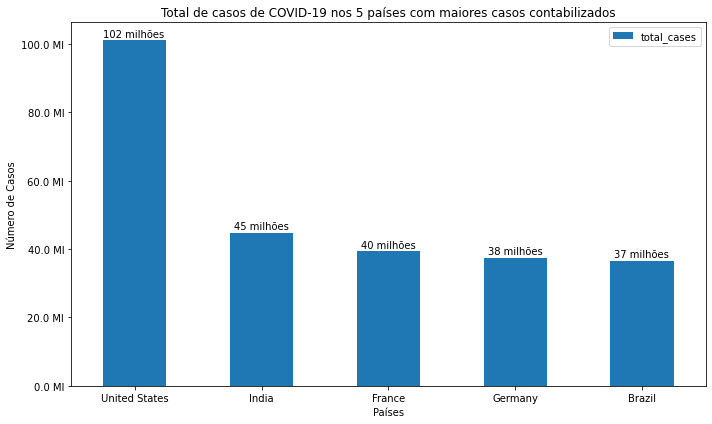

In [ ]:
# plotar o gráfico de barras dos 5 países com mais casos registrados
fig, ax = plt.subplots(figsize=(10,6))
ax.yaxis.set_major_formatter(formatter)


#plotando gráfico de barras do dataset separado
df_casos_covid_totais_pais.plot(x="location", y="total_cases",  kind="bar", ax=ax)

#definindo aspectos da figure
ax.set_title("Total de casos de COVID-19 nos 5 países com maiores casos contabilizados")
ax.set_xlabel("Países")
ax.tick_params(rotation ='auto')
ax.set_ylabel("Número de Casos")
ax.text(0.050, 0.960, '102 milhões', transform=ax.transAxes)
ax.text(0.257, 0.430, '45 milhões', transform=ax.transAxes)
ax.text(0.457, 0.380, '40 milhões', transform=ax.transAxes)
ax.text(0.657, 0.362, '38 milhões', transform=ax.transAxes)
ax.text(0.855, 0.355, '37 milhões', transform=ax.transAxes)



plt.tight_layout()

O Estados Unidos é o país com maior notificação de casos de COVID-19, com cerca de 102 milhões de testes positivados, seguido de Índia, França, Alemanha e Brasil. É interessante analisar que a Índia possui uma população de cerca de 1,4 bilhão de pessoas, e a população americana é de cerca de 330 milhões de pessoas, mas os Estados Unidos têm mais que o dobro de notificações de casos de COVID-19. Isso pode indicar que a Índia está possivelmente com subnotificação de casos, dado que a população indiana é bem maior que a americana e, consequentemente, se espera um maior número de notificações, ou, que as medidas de prevenção adotadas na Índia estão sendo mais eficazes que as adotadas pelos Estados Unidos.

### **Análise dos países com mais mortes de COVID.**


Será feita agora a análise dos países com maior número de mortos por COVID-19.

In [ ]:
#criação de um dataframe que leva em conta somente as colunas "total_deaths" e "location" para o dia 01-08-2023
df_mortes_covid_totais_pais = pd.DataFrame(df_covid_clear.loc[df_covid_clear.date == '2023-01-08', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[:5])

print(df_mortes_covid_totais_pais)

             location  total_deaths
237756  United States     1096008.0
31689          Brazil      694779.0
103491          India      530721.0
186831         Russia      386150.0
144878         Mexico      331324.0


O código abaixo permite editar texto na variável no eixo Y. Nesse caso, será utilizado a apreviação MIL, de forma a indicar que a escala do eixo Y está em Milhares.

In [ ]:
#código que permite editar o eixo y de um gráfico em matplotlib
from matplotlib.ticker import FuncFormatter

def mil(x,pos):
  return f'{x*1e-3} MIL'

formatter = FuncFormatter(mil)

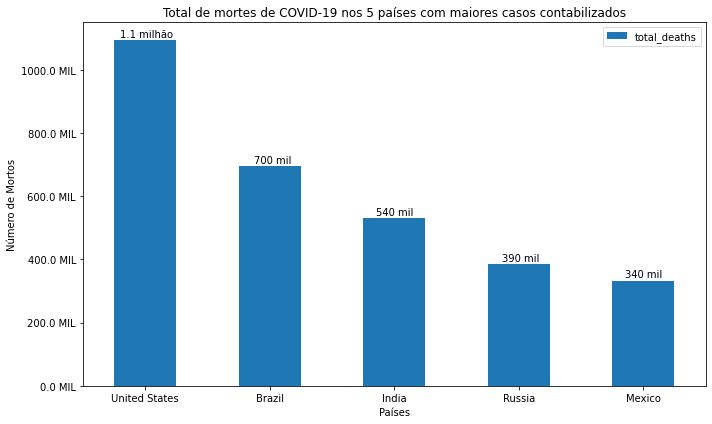

In [ ]:
# plotar o gráfico de barras dos 5 países com mais óbitos registrados
fig, ax = plt.subplots(figsize=(10,6))
ax.yaxis.set_major_formatter(formatter)

#plotando o gráfico de barras para os 5 países com mais casos de mortes, conforme dataset definido
df_mortes_covid_totais_pais.plot(x="location", y="total_deaths",  kind="bar", ax=ax)

# alterando aspectos do figure
ax.set_title("Total de mortes de COVID-19 nos 5 países com maiores casos contabilizados")
ax.set_xlabel("Países")
ax.tick_params(rotation ='auto')
ax.set_ylabel("Número de Mortos")
ax.text(0.059, 0.960, '1.1 milhão', transform=ax.transAxes)
ax.text(0.275, 0.613, '700 mil', transform=ax.transAxes)
ax.text(0.470, 0.470, '540 mil', transform=ax.transAxes)
ax.text(0.673, 0.343, '390 mil', transform=ax.transAxes)
ax.text(0.870, 0.300, '340 mil', transform=ax.transAxes)



plt.tight_layout()

O Estados Unidos é o país que mais contabiliza mortes, seguido por Brasil, Índia, Rússia e México. É esperado que o Estados Unidos e o Brasil apresentem grande número de mortes, devido a grande população e número de notificação de casos de COVID-19. É interessante avaliar que a Índia notifica mais casos de COVID-19 que o Brasil e mesmo assim têm menor ocorrência de mortes, o que pode indicar uma subnotificação dos casos de mortes, ou que devido a ter uma população mais jovem (cerca de 3% da população indiana possui mais de 70 anos, enquanto no Brasil esse número é de 5%) os casos de óbitos lá ocorrem com menor frequência, visto que os casos de óbitos devido à COVID-19 estão concentrados no extrato mais idoso da população. Rússia e México possuem menos casos notificados de COVID-19 do que França e Alemanha, por exemplo, mas maior número de mortes, o que indica possível subnotificação de casos da doença.

### **Evolução das mortes por COVID no mundo.**

Será agora observado a evolução no número de óbitos no mundo ao longo do tempo devido à pandemia de COVID-19, entendendo como foi o comportamento e o que influenciou no aumento ou diminuição do número de mortes. O primeiro passo foi criar os datasets referentes ao mundo, das variáveis: total de casos, total de mortes, novos casos por milhão e vacinação total.

In [ ]:
#criando um dataset com as colunas 'date' e 'total_cases' do dataframe original para a variável World, que é o mundo inteiro
df_evolucao_mortes = pd.DataFrame(df_covid.loc[df_covid.location == 'World', ['date','total_cases']])

#passando a coluna 'date' como index
df_evolucao_mortes = df_evolucao_mortes.set_index('date')

print(df_evolucao_mortes)

            total_cases
date                   
2020-01-22        557.0
2020-01-23        657.0
2020-01-24        944.0
2020-01-25       1437.0
2020-01-26       2120.0
...                 ...
2023-01-17  667451069.0
2023-01-18  667827853.0
2023-01-19  668150196.0
2023-01-20  668493659.0
2023-01-21  668645667.0

[1096 rows x 1 columns]


In [ ]:
#criando um dataset com as colunas 'date' e 'total_deaths' do dataframe original para a variável World, que é o mundo inteiro
df_evolucao_mortes = pd.DataFrame(df_covid.loc[df_covid.location == 'World', ['date','total_deaths']])

#passando a coluna 'date' como index
df_evolucao_mortes = df_evolucao_mortes.set_index('date')

print(df_evolucao_mortes)

            total_deaths
date                    
2020-01-22          17.0
2020-01-23          18.0
2020-01-24          26.0
2020-01-25          42.0
2020-01-26          56.0
...                  ...
2023-01-17     6726616.0
2023-01-18     6729678.0
2023-01-19     6734552.0
2023-01-20     6737898.0
2023-01-21     6738634.0

[1096 rows x 1 columns]


In [ ]:
#criando um dataset com as colunas 'date' e 'new_cases_per_million' do dataframe original para a variável World, que é o mundo inteiro
df_evolucao_casos_novos = pd.DataFrame(df_covid.loc[df_covid.location == 'World', ['date','new_cases_per_million']])

#passando a coluna 'date' como index
df_evolucao_casos_novos = df_evolucao_casos_novos.set_index('date')

print(df_evolucao_casos_novos)

            new_cases_per_million
date                             
2020-01-22                  0.000
2020-01-23                  0.013
2020-01-24                  0.036
2020-01-25                  0.062
2020-01-26                  0.086
...                           ...
2023-01-17                 43.912
2023-01-18                 47.245
2023-01-19                 40.419
2023-01-20                 43.067
2023-01-21                 19.060

[1096 rows x 1 columns]


In [ ]:
#criando um dataset com as colunas 'date' e 'total_vaccionations' do dataframe original para a variável World, que é o mundo inteiro
df_evolucao_vacinação = pd.DataFrame(df_covid.loc[df_covid.location == 'World', ['date','total_vaccinations']])

#passando a coluna 'date' como index
df_evolucao_vacinação = df_evolucao_vacinação.set_index('date')

print(df_evolucao_vacinação)

            total_vaccinations
date                          
2020-01-22                 NaN
2020-01-23                 NaN
2020-01-24                 NaN
2020-01-25                 NaN
2020-01-26                 NaN
...                        ...
2023-01-17        1.322408e+10
2023-01-18        1.322486e+10
2023-01-19        1.322554e+10
2023-01-20        1.322581e+10
2023-01-21        1.322612e+10

[1096 rows x 1 columns]


In [ ]:
#código que permite editar o eixo y de um gráfico em matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates

def milho(x,pos):
  return f'{x*1e-6} MILHÕES'

formatter = FuncFormatter(milho)


O gráfico traçado a seguir exibe a evolução das mortes devido à pandemia de COVID-19 ao longo do tempo em todo o mundo. É possível observar que as mortes começam em um ritmo mais lento, e depois há uma aceleração. No tempo mais recente, há uma atenuação das mortes, provavelmente devido ao aumento da vacinação ao redor de todo o globo.

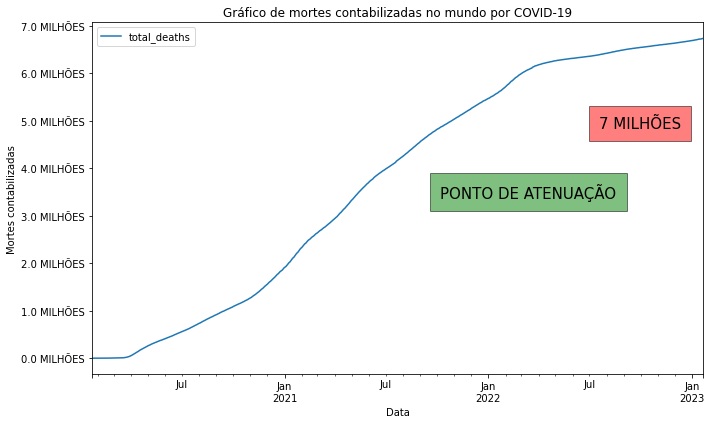

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) #criando o AXIS dentro da uma figure
ax.yaxis.set_major_formatter(formatter)

#plotando o gráfico de linha do número de mortes ao longo do tempo por COVID-19 no mundo tudo
df_evolucao_mortes.plot(kind="line", ax=ax)

#alterações no objeto figure
ax.set_title("Gráfico de mortes contabilizadas no mundo por COVID-19") #título do plot1
ax.set_ylabel("Mortes contabilizadas") #título do eixo Y do plot 1
ax.set_xlabel("Data") #título do eixo X do plot 1

ax.text(0.830, 0.700, '7 MILHÕES',  
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10},
        color='black', fontsize=15,
        transform=ax.transAxes)

ax.text(0.570, 0.500, 'PONTO DE ATENUAÇÃO',  
        bbox={'facecolor': 'GREEN', 'alpha': 0.5, 'pad': 10},
        color='black', fontsize=15,
        transform=ax.transAxes)

plt.tight_layout()

Para verificar o efeito da vacinação, será realizada uma análise gráfica comparando o número de novos casos registrados semanalmente, com a evolução do total de doses aplicadas na população:

In [ ]:
#código que permite editar o eixo y de um gráfico em matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates

def bilho(x,pos):
  return f'{x*1e-9} BILHÕES'

formatter = FuncFormatter(bilho)


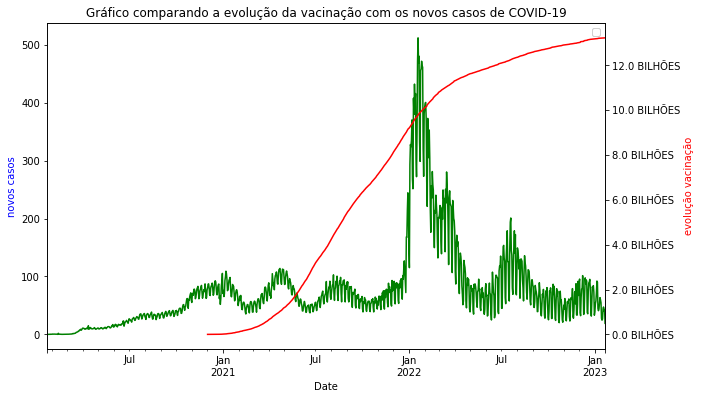

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()  #permite plotar 2 eixos x diferentes com o mesmo eixo x na figura

#plot1 - evolução dos novos casos semanais ao longo do tempo
df_evolucao_casos_novos.plot(kind="line", ax=ax1, color ='g')
ax1.set_xlabel('Date')
ax1.set_ylabel('novos casos', color='b')
ax1.legend([])

#plot2 - evolução da vacinação ao longo do tempo
df_evolucao_vacinação.plot(kind="line", ax=ax2, color ='r')
ax2.yaxis.set_major_formatter(formatter)
ax2.set_ylabel('evolução vacinação', color='r')
ax2.legend([])

plt.title("Gráfico comparando a evolução da vacinação com os novos casos de COVID-19")
plt.show()

Ao compararmos os novos casos de COVID-19 com a evolução da vacinação, observa-se que os novos casos estão diminuindo após um pico no início de 2022, e que a vacinação está avançando, já tendo passado de 12 bilhões de doses aplicadas, embora o ritmo da vacinação esteja diminuindo.

###**Relação entre a PIB per capita e o número total de mortos nos países**###


Uma relação muito interessante de ser analisada é observar se os países mais ricos, os chamados "desenvolvidos", realmente tiveram um melhor desempenho frente à pandemia do que os países mais pobres. Uma maneira interessante de analisar isso é traçando o gráfico de dispersão comparando PIB Per Capita x Mortes Contabilizadas, como a seguir:

In [ ]:
#código que permite editar o eixo y de um gráfico em matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates

def milho(x,pos):
  return f'{x*1e-3} MIL'

formatter = FuncFormatter(milho)


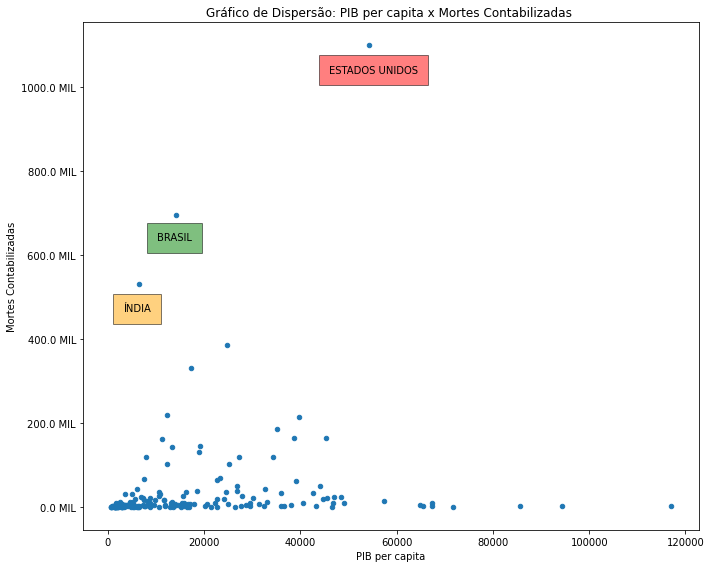

In [ ]:
# plotar scatter plot 
fig,ax = plt.subplots(figsize=(10,8))
ax.yaxis.set_major_formatter(formatter)

#traçando o gráfico de dispersão comparando as mortes totais em relação ao PIB Per Capita
df_covid_clear.loc[df_covid_clear.date == '2023-01-14'].plot.scatter(x='gdp_per_capita',y='total_deaths',ax=ax)


#alterando aspectos da Figure
ax.set_title("Gráfico de Dispersão: PIB per capita x Mortes Contabilizadas ") #título do plot1
ax.set_ylabel("Mortes Contabilizadas") #título do eixo Y do plot 1
ax.set_xlabel("PIB per capita")

ax.text(0.400, 0.900, 'ESTADOS UNIDOS',  
        bbox={'facecolor': 'RED', 'alpha': 0.5, 'pad': 10},
        color='black', fontsize=10,
        transform=ax.transAxes)

ax.text(0.120, 0.570, 'BRASIL',  
        bbox={'facecolor': 'GREEN', 'alpha': 0.5, 'pad': 10},
        color='black', fontsize=10,
        transform=ax.transAxes)

ax.text(0.065, 0.430, 'ÍNDIA',  
        bbox={'facecolor': 'ORANGE', 'alpha': 0.5, 'pad': 10},
        color='black', fontsize=10,
        transform=ax.transAxes)




plt.tight_layout()


O gráfico acima mostra a posição de Estados Unidos, Brasil e Índia quando se compara o PIB per capita com as mortes totais contabilizadas nos países. É possível observar que dos 3 países com mais mortes, Brasil e Índia são países com um valor de PIB per capita mais baixo, enquanto o Estados Unidos é um país mais rico. Será que o PIB per capita influência no total de mortes de um país? Para responder essa pergunta, será plotado um gráfico de dispersão de mortes contabilizadas por milhão x PIB per capita: 

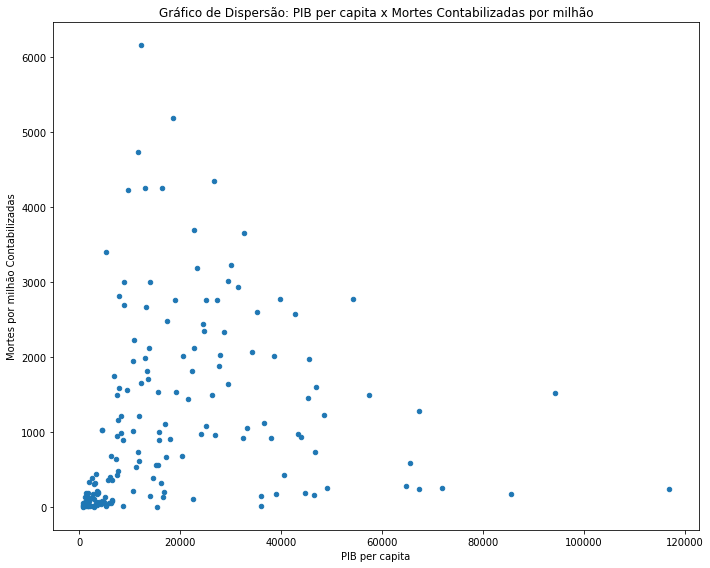

In [ ]:
# plotar scatter plot 
fig,ax = plt.subplots(figsize=(10,8))


#traçando o gráfico de dispersão comparando as mortes totais em relação ao PIB Per Capita
df_covid_clear.loc[df_covid_clear.date == '2022-02-21'].plot.scatter(x='gdp_per_capita',y='total_deaths_per_million',ax=ax)

#alterando aspectos da Figure
ax.set_title("Gráfico de Dispersão: PIB per capita x Mortes Contabilizadas por milhão") #título do plot1
ax.set_ylabel("Mortes por milhão Contabilizadas") #título do eixo Y do plot 1
ax.set_xlabel("PIB per capita")




plt.tight_layout()

##**Análise exploratória do Brasil**##



O foco das análises agora será o Brasil. Primeiramente, serão separados os dados do Brasil. Para isso, será usado um Dataset com os dados do Brasil antes de serem tratados e retirados os valores nulos (df_brasil_antes), e um após os dados serem tratados e terem seu os valores nulos retirados (df_brasil).

In [ ]:
df_brasil_antes = df_covid.loc[df_covid.location == "Brazil"]

df_brasil_antes.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
31048,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
31049,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
31050,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
31051,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,2427.8,1.14,3.12,11.275651
31052,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


Agora, o Dataset do Brasil após a retirada das colunas com menos de 80% dos valores nulos:

In [ ]:
df_brasil = df_covid_clear.loc[df_covid.location == "Brazil"]

df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,new_deaths_per_million,new_deaths_smoothed_per_million,population_density,median_age,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,population
31073,BRA,South America,Brazil,2020-03-22,1546.0,525.0,197.714,25.0,10.0,3.571,...,0.046,0.017,25.04,33.5,5.06,14103.452,177.961,8.11,75.88,215313504.0
31074,BRA,South America,Brazil,2020-03-23,1924.0,378.0,246.286,34.0,9.0,4.857,...,0.042,0.023,25.04,33.5,5.06,14103.452,177.961,8.11,75.88,215313504.0
31075,BRA,South America,Brazil,2020-03-24,2247.0,323.0,275.143,46.0,12.0,6.429,...,0.056,0.030,25.04,33.5,5.06,14103.452,177.961,8.11,75.88,215313504.0
31076,BRA,South America,Brazil,2020-03-25,2554.0,307.0,311.714,59.0,13.0,8.000,...,0.060,0.037,25.04,33.5,5.06,14103.452,177.961,8.11,75.88,215313504.0
31077,BRA,South America,Brazil,2020-03-26,2985.0,431.0,337.714,77.0,18.0,10.143,...,0.084,0.047,25.04,33.5,5.06,14103.452,177.961,8.11,75.88,215313504.0


###**Primeiro Caso de COVID-19 e Primeiro Óbito de COVID-19 no Brasil**###

Para encontrar o primeiro caso de COVID-19 no Brasil, será usado o dataset df_brasil_antes, buscando o localizar o primeiro dia em que os casos totais contabilizados foram maiores do que zero.

In [ ]:
df_brasil_antes.loc[df_brasil_antes['total_cases']>0]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
31048,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
31049,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
31050,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
31051,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,2427.8,1.14,3.12,11.275651
31052,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32118,BRA,South America,Brazil,2023-01-31,36824580.0,16766.0,10452.857,697074.0,182.0,84.143,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
32119,BRA,South America,Brazil,2023-02-01,36837943.0,13363.0,9895.143,697200.0,126.0,85.286,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
32120,BRA,South America,Brazil,2023-02-02,36837943.0,0.0,9895.143,697200.0,0.0,85.286,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
32121,BRA,South America,Brazil,2023-02-03,36866283.0,28340.0,10716.571,697353.0,153.0,87.286,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


Conforme mostrado nos dados acima, o primeiro caso de COVID-19 contabilizado no Brasil foi em **26 de Fevereiro de 2020**.

Para localizar o dia da ocorrência do primeiro óbito de COVID-19 no Brasil, será usado o dataset df_brasil_antes, com o intuito de selecionar o primeiro dia em que o número contabilizado de mortes foi maior do que zero.

In [ ]:
df_brasil_antes.loc[df_brasil_antes['total_deaths']>0]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
31068,BRA,South America,Brazil,2020-03-17,321.0,121.0,41.429,1.0,1.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
31069,BRA,South America,Brazil,2020-03-18,372.0,51.0,47.714,3.0,2.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
31070,BRA,South America,Brazil,2020-03-19,621.0,249.0,81.286,6.0,3.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
31071,BRA,South America,Brazil,2020-03-20,793.0,172.0,91.714,11.0,5.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
31072,BRA,South America,Brazil,2020-03-21,1021.0,228.0,124.286,15.0,4.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32118,BRA,South America,Brazil,2023-01-31,36824580.0,16766.0,10452.857,697074.0,182.0,84.143,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
32119,BRA,South America,Brazil,2023-02-01,36837943.0,13363.0,9895.143,697200.0,126.0,85.286,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
32120,BRA,South America,Brazil,2023-02-02,36837943.0,0.0,9895.143,697200.0,0.0,85.286,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
32121,BRA,South America,Brazil,2023-02-03,36866283.0,28340.0,10716.571,697353.0,153.0,87.286,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


Conforme mostrado nos dados acima, o primeiro caso de óbito devido à COVID-19 contabilizado no Brasil foi em **17 de Março de 2020**. Uma diferença de quase 20 dias entre a notificação do primeiro caso e o primeiro óbito.

###**Análise dos casos de COVID-19 no Brasil**###

Conforme já visto no gráfico comparativo entre o número total de casos dos países, o número total de casos de COVID-19 no Brasil é de aproximadamente 37 milhões (até a data de realização desta análise). Mas como será que deu essa evolução de casos de COVID-19 no país? E em relação ao mundo, como a média de novos casos do Brasil se comportou? São essas perguntas que serão respondidas agora.
Primeiramente, serão criados os datasets que focados nos novos casos do Brasil, para então serem traçados os gráficos.

In [ ]:
#criando o dataset com as informações de novos casos no brasil
df_evolucao_casos_brasil = pd.DataFrame(df_covid.loc[df_covid.location == 'Brazil', ['date','new_cases']])

#colocando a coluna "date" como index do dataset criado
df_evolucao_casos_brasil = df_evolucao_casos_brasil.set_index('date')

print(df_evolucao_casos_brasil)

            new_cases
date                 
2020-02-26        1.0
2020-02-27        0.0
2020-02-28        0.0
2020-02-29        1.0
2020-03-01        0.0
...               ...
2023-01-31    16766.0
2023-02-01    13363.0
2023-02-02        0.0
2023-02-03    28340.0
2023-02-04     1118.0

[1075 rows x 1 columns]


Pode-se então traçar a curva de novos casos diários no Brasil:

In [ ]:
#código que permite editar o eixo y de um gráfico em matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates

def milho(x,pos):
  return f'{x*1e-3} MIL'

formatter = FuncFormatter(milho)

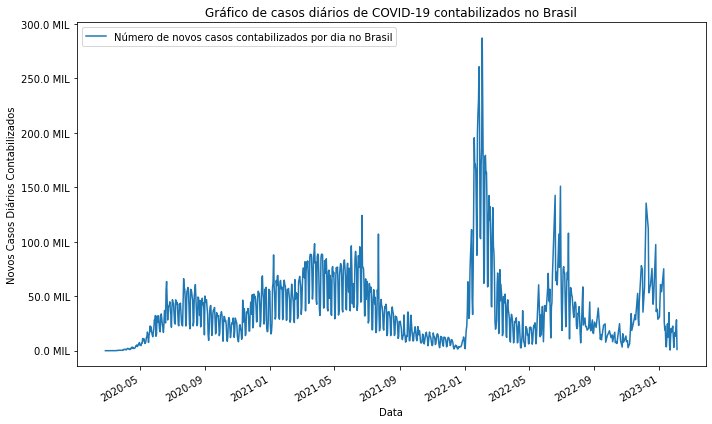

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) #criando o AXIS dentro da uma figure
ax.yaxis.set_major_formatter(formatter)

#criando gráfico de linha com a contabilização dos novos casos de COVID-19 
df_evolucao_casos_brasil.plot(kind="line", ax=ax)


ax.set_title("Gráfico de casos diários de COVID-19 contabilizados no Brasil") #título do plot1
ax.set_xlabel("Data") #título do eixo X do plot 1
ax.set_ylabel("Novos Casos Diários Contabilizados")

plt.legend(["Número de novos casos contabilizados por dia no Brasil"])


plt.tight_layout()

O pico de infecções por COVID-19 ocorreu em no início do ano de 2022, possivelmente devido ao surgimento da variante Ômicron, uma variante do vírus SARS-CoV-2 que possui uma disseminação mais acelerada, e também a diminuição das restrições de circulação de pessoas. Comparando o comportamento dos casos de COVID-19 do Brasil em relação ao resto do mundo, temos:

In [ ]:
#criando o dataset com as informações de novos casos por milhão no brasil
df_evolucao_casos_por_milhao_brasil = pd.DataFrame(df_covid.loc[df_covid.location == 'Brazil', ['date','new_cases_smoothed_per_million']])

#colocando a coluna "date" como index do dataset criado
df_evolucao_casos_por_milhao_brasil = df_evolucao_casos_por_milhao_brasil.set_index('date')

print(df_evolucao_casos_por_milhao_brasil)


            new_cases_smoothed_per_million
date                                      
2020-02-26                             NaN
2020-02-27                             NaN
2020-02-28                             NaN
2020-02-29                             NaN
2020-03-01                             NaN
...                                    ...
2023-01-31                          48.547
2023-02-01                          45.957
2023-02-02                          45.957
2023-02-03                          49.772
2023-02-04                          50.514

[1075 rows x 1 columns]


Criando agora o dataset com as informações de novos casos por milhão no mundo:

In [ ]:
#criando o dataset com as informações de novos casos por milhão no mundo
df_evolucao_casos_por_milhao_mundo = pd.DataFrame(df_covid.loc[df_covid.location == 'World', ['date','new_cases_smoothed_per_million']])

#colocando a coluna "date" como index do dataset criado
df_evolucao_casos_por_milhao_mundo = df_evolucao_casos_por_milhao_mundo.set_index('date')

print(df_evolucao_casos_por_milhao_mundo)

            new_cases_smoothed_per_million
date                                      
2020-01-22                             NaN
2020-01-23                             NaN
2020-01-24                             NaN
2020-01-25                             NaN
2020-01-26                             NaN
...                                    ...
2023-01-31                          26.012
2023-02-01                          26.023
2023-02-02                          25.569
2023-02-03                          25.672
2023-02-04                          25.117

[1110 rows x 1 columns]


Para verificar o desempenho do Brasil no combate à pandemia, podemos comparar a média de casos de infecção de COVID-19 diária do Brasil com o restante do mundo. Este gráfico está mostrado a seguir:

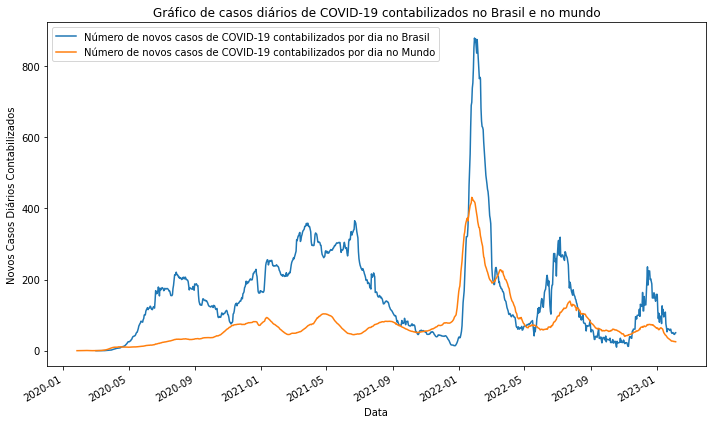

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) #criando o AXIS dentro da uma figure

df_evolucao_casos_por_milhao_brasil.plot(kind="line", ax=ax)
df_evolucao_casos_por_milhao_mundo.plot(kind="line", ax=ax)

ax.set_title("Gráfico de casos diários de COVID-19 contabilizados no Brasil e no mundo") #título do plot1
ax.set_ylabel("Novos Casos Diários Contabilizados")
ax.set_xlabel("Data") #título do eixo X do plot 1

plt.legend(["Número de novos casos de COVID-19 contabilizados por dia no Brasil","Número de novos casos de COVID-19 contabilizados por dia no Mundo"])

plt.tight_layout()

É possível concluir que o vírus da COVID-19 se espalhou mais no Brasil em relação ao mundo, pois a média de novos casos por milhão no Brasil é constantemente acima do número de novos casos por milhão no mundo. Para não restar dúvidas, esse comportamento fica mais fácil de ser identificado no gráfico em escala logartimica, a seguir:

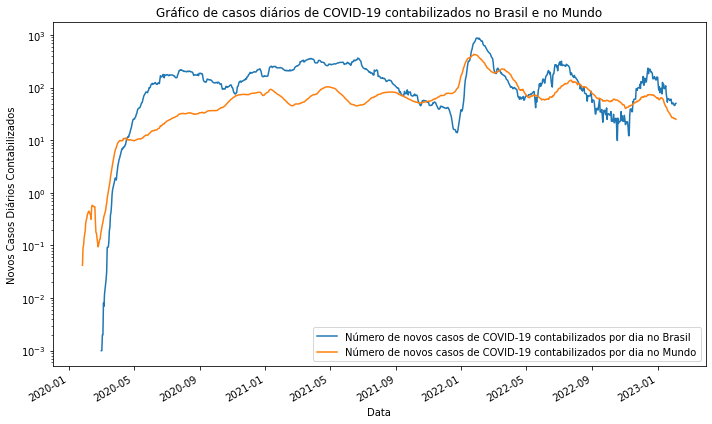

In [ ]:
df_evolucao_casos_por_milhao_brasil = df_evolucao_casos_por_milhao_brasil[df_evolucao_casos_por_milhao_brasil.new_cases_smoothed_per_million > 0]
df_evolucao_casos_por_milhao_mundo = df_evolucao_casos_por_milhao_mundo[df_evolucao_casos_por_milhao_mundo.new_cases_smoothed_per_million > 0]

fig, ax = plt.subplots(figsize=(10,6)) #criando o AXIS dentro da uma figure

#escala logarítmica do eixo y
ax.set_yscale("log")

#definindo como gráfico de linha
df_evolucao_casos_por_milhao_brasil.plot(kind="line", ax=ax)
df_evolucao_casos_por_milhao_mundo.plot(kind="line", ax=ax)


#ditando elementos do figure
ax.set_title("Gráfico de casos diários de COVID-19 contabilizados no Brasil e no Mundo")
ax.set_ylabel("Novos Casos Diários Contabilizados")
ax.set_xlabel("Data")

plt.legend(["Número de novos casos de COVID-19 contabilizados por dia no Brasil","Número de novos casos de COVID-19 contabilizados por dia no Mundo"])
plt.tight_layout()
plt.show()


###**Análise dos óbitos por COVID-19 no Brasil**###

Conforme já visto no gráfico comprativo entre o número total de óbitos dos países, o número total de óbitos de COVID-19 no Brasil é de aproximadamente 700 mil pessoas (até a data de realização desta análise). Mas como será que deu essa evolução de óbitos de COVID-19 no país? E em relação ao mundo, como a média de novos casos do Brasil se comportou? É essas perguntas que serão respondidas agora.

In [ ]:
#criando dataset com a evolução de mortes diárias no brasil
df_evolucao_mortes_brasil = pd.DataFrame(df_covid.loc[df_covid.location == 'Brazil', ['date','new_deaths']])

#colocando a coluna date como index do dataset
df_evolucao_mortes_brasil = df_evolucao_mortes_brasil.set_index('date')

#retirando do dataset as linhas com valorea ausentes
df_evolucao_mortes_brasil = df_evolucao_mortes_brasil.dropna()

#mostrar o dataset
print(df_evolucao_mortes_brasil)

            new_deaths
date                  
2020-03-17         1.0
2020-03-18         2.0
2020-03-19         3.0
2020-03-20         5.0
2020-03-21         4.0
...                ...
2023-01-31       182.0
2023-02-01       126.0
2023-02-02         0.0
2023-02-03       153.0
2023-02-04        12.0

[1053 rows x 1 columns]


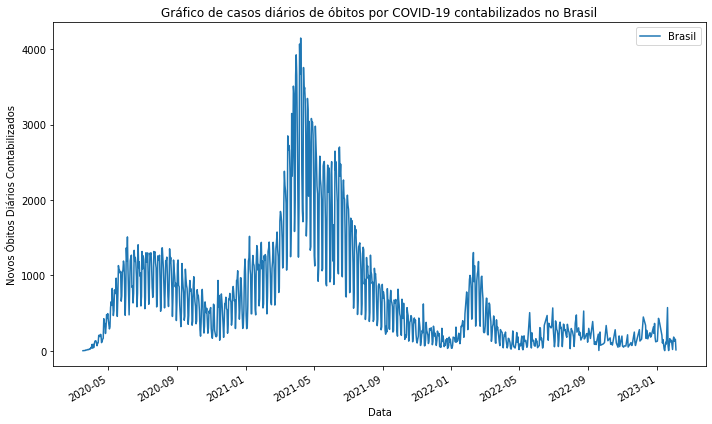

In [ ]:
# gráfico da evolução de mortes por covid-19 no Brasil, plotado a partir do dataset criado anteriormente
fig, ax = plt.subplots(figsize=(10,6)) #criando o AXIS dentro da uma figure

#selecionando gráfico de linha
df_evolucao_mortes_brasil.plot(kind="line", ax=ax)


ax.set_title("Gráfico de casos diários de óbitos por COVID-19 contabilizados no Brasil") #título do plot1
ax.set_ylabel("Novos Óbitos Diários Contabilizados") #título do eixo Y do plot 1
ax.set_xlabel("Data") #título do eixo X do plot 1

plt.legend(["Brasil"])

plt.tight_layout()

In [ ]:
max_deaths = df_evolucao_mortes_brasil['new_deaths'].max()
date_of_max = df_evolucao_mortes_brasil['new_deaths'].idxmax()
print(f'o maior número de mortes em um único dia no brasil é {max_deaths}, na data {date_of_max}')


o maior número de mortes em um único dia no brasil é 4148.0, na data 2021-04-08 00:00:00


O pico de registro de novos óbitos no Brasil ocorreu em meados de 2021, quando a vacinação no país ainda não estava acelerada. O dia com maior registro de óbitos foi o dia 08 de Abril de 2021, com cerca de 4100 mortes registradas em um único dia. Agora será feito a análise comparativo entre o novo número de mortes por milhão de pessoas no Brasil e no mundo. Para isso, primeiramente será criado um dataset com a evolução 

In [ ]:
#criando dataset com as evoluções de mortes por milhão de pessoas no Brasil
df_evolucao_mortes_por_milhao_Brasil = pd.DataFrame(df_covid.loc[df_covid.location == 'Brazil', ['date','new_deaths_smoothed_per_million']])

#colocando a coluna date como index
df_evolucao_mortes_por_milhao_Brasil = df_evolucao_mortes_por_milhao_Brasil.set_index('date')

print(df_evolucao_mortes_por_milhao_Brasil)

            new_deaths_smoothed_per_million
date                                       
2020-02-26                              NaN
2020-02-27                              NaN
2020-02-28                              NaN
2020-02-29                              NaN
2020-03-01                              NaN
...                                     ...
2023-01-31                            0.391
2023-02-01                            0.396
2023-02-02                            0.396
2023-02-03                            0.405
2023-02-04                            0.413

[1075 rows x 1 columns]


In [ ]:
#criando dataset com as evoluções de mortes por milhão de pessoas no mundo
df_evolucao_mortes_por_milhao_mundo = pd.DataFrame(df_covid.loc[df_covid.location == 'World', ['date','new_deaths_smoothed_per_million']])

#colocando a coluna date como index
df_evolucao_mortes_por_milhao_mundo = df_evolucao_mortes_por_milhao_mundo.set_index('date')

print(df_evolucao_mortes_por_milhao_mundo)

            new_deaths_smoothed_per_million
date                                       
2020-01-22                              NaN
2020-01-23                              NaN
2020-01-24                              NaN
2020-01-25                              NaN
2020-01-26                              NaN
...                                     ...
2023-01-31                            0.313
2023-02-01                            0.318
2023-02-02                            0.311
2023-02-03                            0.322
2023-02-04                            0.267

[1110 rows x 1 columns]


Para verificar o desempenho do Brasil no combate à pandemia, podemos comparar a média de mortos por milhão diários devido à COVID-19 diária do Brasil com o restante do mundo. Este gráfico está mostrado a seguir:

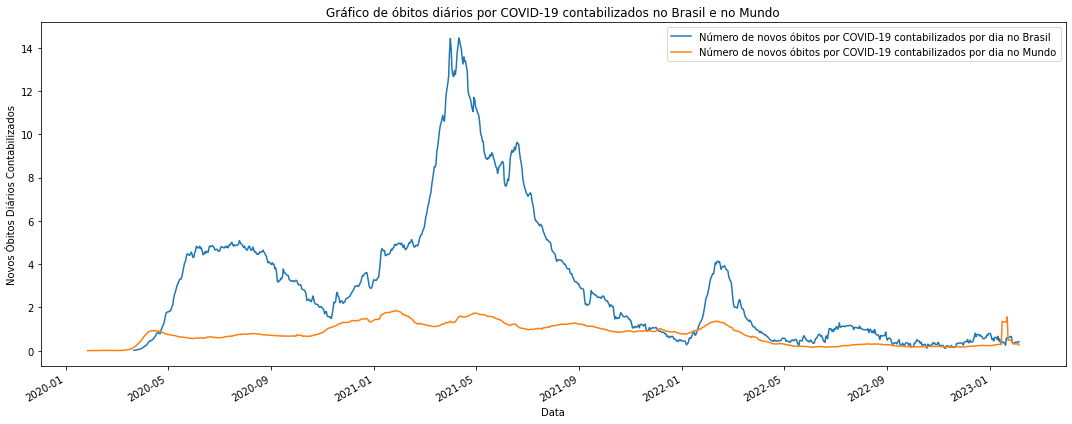

In [ ]:
fig, ax = plt.subplots(figsize=(15,6)) #criando o AXIS dentro da uma figure

df_evolucao_mortes_por_milhao_Brasil.plot(kind="line", ax=ax)
df_evolucao_mortes_por_milhao_mundo.plot(kind="line", ax=ax)

ax.set_title("Gráfico de óbitos diários por COVID-19 contabilizados no Brasil e no Mundo") #título do plot1
ax.set_ylabel("Novos Óbitos Diários Contabilizados") #título do eixo Y do plot 1
ax.set_xlabel("Data") #título do eixo X do plot 1

plt.legend(["Número de novos óbitos por COVID-19 contabilizados por dia no Brasil","Número de novos óbitos por COVID-19 contabilizados por dia no Mundo"])

plt.tight_layout()

É possível concluir que as estratégias para combater a pandemia da COVID-19 adotadas no Brasil se mostraram equivocadas em relação ao mundo, pois a média de óbitos por milhão no Brasil é constantemente muito acima do número de novos óbitos por milhão no mundo. É possível também ver que o pico de mortes que ocorreu em meados de 2021 no Brasil, não ocorreu no mundo, o que indica a ocorrência de algum fenômeno local que não se repetiu em outras partes do Globo. Esse comportamento fica mais fácil de ser identificado no gráfico em escala logartimica, a seguir:

Em escala logarítmica, teremos o gráfico plotado da seguinte forma:

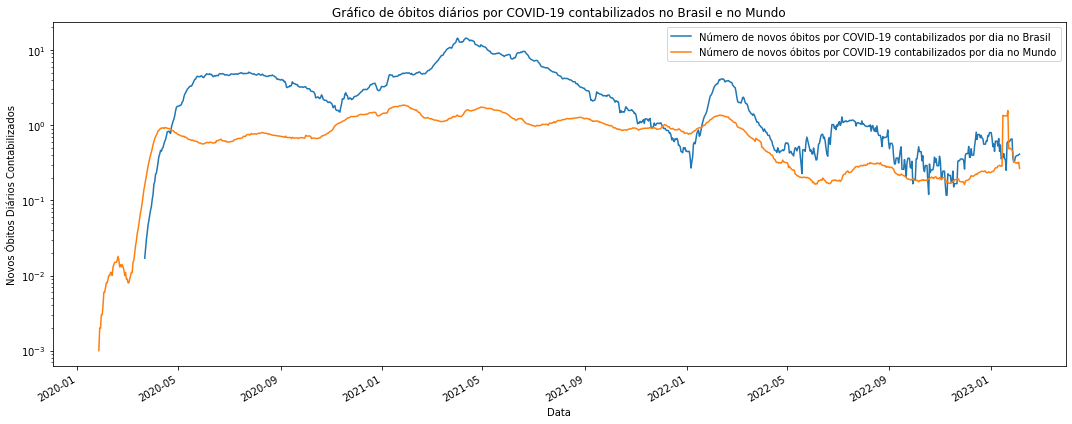

In [ ]:
#selecionando no dataframe dados maiores que 0
df_evolucao_mortes_por_milhao_Brasil = df_evolucao_mortes_por_milhao_Brasil[df_evolucao_mortes_por_milhao_Brasil.new_deaths_smoothed_per_million > 0] 
#selecionando no dataframe dados maiores que 0
df_evolucao_mortes_por_milhao_mundo = df_evolucao_mortes_por_milhao_mundo[df_evolucao_mortes_por_milhao_mundo.new_deaths_smoothed_per_million > 0] 

fig, ax = plt.subplots(figsize=(15,6))
ax.set_yscale("log")

df_evolucao_mortes_por_milhao_Brasil.plot(kind="line", ax=ax)
df_evolucao_mortes_por_milhao_mundo.plot(kind="line", ax=ax)

ax.set_title("Gráfico de óbitos diários por COVID-19 contabilizados no Brasil e no Mundo") #título do plot1
ax.set_ylabel("Novos Óbitos Diários Contabilizados")
ax.set_xlabel("Data")

plt.legend(["Número de novos óbitos por COVID-19 contabilizados por dia no Brasil","Número de novos óbitos por COVID-19 contabilizados por dia no Mundo"])
plt.tight_layout()
plt.show()

## Conclusões
###  Mundo
- A base de dados utilizada nessa análise possui muito valores ausentes, sendo necessário realizar um grande tratamento dos dados para execução das análises;
- Os cinco países com mais casos registrados de COVID-19 são: Estados Unidos, Índia, França, Alemanha e Brasil;
- Os cinco países com mais óbitos registrados de COVID-19 são: Estados Unidos, Índia,Brasil, Rússia e México;
- O Estados Unidos é o país com maior número de casos e mortes. A Índia possui uma população cerca de 4 vezes maior que a americana, mas possui metade das mortes e dos casos, o que indica uma possível subnotificação;
- Rússia e México possuem menos casos notificados de COVID-19 do que França e Alemanha, por exemplo, mas maior número de mortes, o que indica possível subnotificação de casos da doença;
- Há no mundo uma atenuação da evolução das mortes por COVID-19, iniciada no mês de Abril de 2022;
- O mundo está se aproximando de 7 milhões de óbitos devido à COVID-19;
- Quanto maior o PIB Per Capita de um país, menor é o número de mortes por milhão de habitante.

### Brasil

- O primeiro caso de COVID-19 no Brasil foi registrado no dia 26 de Fevereiro de 2020;
- O primeiro óbito devido a COVID-19 no Brasil foi registrado no dia 17 de Março de 2020;
- O Brasil contabiliza aproximadamente 37 milhões de casos de covid-19 durante todo o tempo de pandemia;
- O dia com maior registro de óbitos em um único dia no Brasil devido a COVID-19 foi o dia 08 Abril de 2021, que contabilizou 4100 mortes; 
- A Média de casos e mortes no Brasil é MUITO acima do restante do mundo,indicando que as estratégias de combate da pandemia adotadas pelas autoridades no país não foram acertadas.

